In [157]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
% matplotlib inline

In [2]:
import sqlite3

In [3]:
!ls ../jp-data/clean.sqlite

../jp-data/clean.sqlite


In [4]:
# Create the db if it doesn't exist
bdd = sqlite3.connect("../jp-data/clean.sqlite")
bdd.row_factory = sqlite3.Row
c = bdd.cursor()
c

In [5]:
c.execute("SELECT * FROM drugs")
results = c.fetchall()

In [6]:
drugs = pd.read_sql_query("SELECT * FROM drugs", bdd)

In [7]:
abstracts = pd.read_sql_query("SELECT * FROM abstracts", bdd)
abstracts['lit_id'] = abstracts['lit_id'].map(lambda x: str(x))

In [8]:
patient0 = pd.read_sql_query("SELECT * FROM patient0", bdd)

In [27]:
# store all tables in a dictionary
tables = dict(drugs=drugs, abstracts=abstracts, patient0=patient0)
print(tables.keys())

dict_keys(['drugs', 'abstracts', 'patient0'])


In [28]:
vars_ = drugs['variant'].unique()
print(len(vars_))

2598


In [29]:
drugs.columns

Index(['id', 'annotation', 'variant', 'gene', 'chemical', 'lit_id',
       'pheno_cat', 'significance', 'notes', 'sentence', 'study_para',
       'alleles', 'chromosome'],
      dtype='object')

In [30]:
drugs.sample(10)['lit_id']

1917    23816762
385     20859243
2003    16081343
2463    24583629
4220    25897834
6222    24703092
4717    26779253
4587    27523435
4619    27523435
5560    27758888
Name: lit_id, dtype: object

In [31]:
abstracts['abstract_clean'] = abstracts['abstract'].map(lambda x: x.strip())
abstracts.head()

,id,lit_id,abstract,abstract_clean
0,1,26866747,\nTo investigate the effects of KCNQ1 polymorp...,To investigate the effects of KCNQ1 polymorphi...
1,2,25974723,\nLipid-based nutrient supplements (LNSs) are ...,Lipid-based nutrient supplements (LNSs) are in...
2,3,24293076,\nHuman immunodeficiency virus type 1 (HIV-1) ...,Human immunodeficiency virus type 1 (HIV-1) in...
3,4,19620853,\nThe dose of carbamazepine required to achiev...,The dose of carbamazepine required to achieve ...
4,5,28246425,\nAims. The influence of interleukin-10 (IL-10...,Aims. The influence of interleukin-10 (IL-10) ...


In [280]:
drug_names = drugs['chemical']
drug_names = drug_names.sort_values()
drug_names = drug_names.unique()

excluded = ['(S)-EDDP', '3,4-methylenedioxymethamphetamine',
       '4-hydroxycyclophosphamide', '4-hydroxytamoxifen',
       '6beta-hydroxycortisol', 'Aldosterone antagonists',
       'Antiemetics And Antinauseants', 'Antihypertensives',
       'Arsenic compounds', 'Beta Blocking Agents',
       'Beta blocking agents, selective', 'Bisphosphonates',
       'Corticosteroids For Systemic Use', 'Dabigatran',
       'Dipeptidyl peptidase 4 (DPP-4) inhibitors',
       'Drugs Used In Diabetes', 'Drugs used in nicotine dependence',
       'Enzyme inhibitors', 'Hepatitis vaccines', 'Immunoglobulins',
       'Measles vaccines', 'Methyldopa', 'Pertussis vaccines',
       'Platinum compounds', 'SN-38',
       'Selective serotonin reuptake inhibitors',
       'Tumor necrosis factor alpha (TNF-alpha) inhibitors', 'Vitamin K',
       'XK469', 'angiotensin II']

drug_names_ending_s = [d for d in drug_names if d[-1]=='s']
# print(drug_names_ending_s)

excluded = list(set(excluded+drug_names_ending_s))
print(excluded)

['catecholamines', 'temsirolimus', 'Antihypertensives', 'hmg coa reductase inhibitors', 'antiepileptics', 'Pertussis vaccines', 'Beta blocking agents, selective', 'Dipeptidyl peptidase 4 (DPP-4) inhibitors', 'antineoplastic agents', 'tacrolimus', 'sulfonamides, urea derivatives', 'Immunoglobulins', 'Enzyme inhibitors', 'selective beta-2-adrenoreceptor agonists', 'sirolimus', '3,4-methylenedioxymethamphetamine', 'Bisphosphonates', 'Vitamin K', 'SN-38', '(S)-EDDP', 'Drugs used in nicotine dependence', 'Platinum compounds', 'corticosteroids', 'antidepressants', 'XK469', 'everolimus', 'vitamin d and analogues', 'Arsenic compounds', 'Dabigatran', 'interferons', 'Tumor necrosis factor alpha (TNF-alpha) inhibitors', '4-hydroxytamoxifen', 'Measles vaccines', 'Methyldopa', '6beta-hydroxycortisol', 'antipsychotics', 'triglycerides', 'opioids', 'Antiemetics And Antinauseants', 'artemisinin and derivatives', 'Aldosterone antagonists', 'diuretics', 'Selective serotonin reuptake inhibitors', 'conjug

In [281]:
drug_names = [d for d in drug_names if d not in excluded]
drug_names[0:10]

['acamprosate',
 'acenocoumarol',
 'acetaminophen',
 'acetylcholine',
 'acetylcysteine',
 'acitretin',
 'adalimumab',
 'afatinib',
 'agomelatine',
 'alemtuzumab']

In [274]:
widgets.Dropdown(
    options=drug_names,
    value='cisplatin',
    description='Drug:',
    disabled=False,
)

Dropdown(description='Drug:', index=61, options=('acamprosate', 'acenocoumarol', 'acetaminophen', 'acetylcholi…

In [275]:
db_patients = tables.get('patient0')
db_patients.head(15)

,id,variant,genotype
0,1,rs11807862,TT
1,2,rs228729,CC
2,3,rs228642,CC
3,4,rs228697,CC
4,5,rs2640909,TT
5,6,rs12139042,GG
6,7,rs1476413,CT
7,8,rs1801131,TG
8,9,rs1801133,GG
9,10,rs17421511,GG


In [276]:
db_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 3 columns):
id          1891 non-null int64
variant     1891 non-null object
genotype    1891 non-null object
dtypes: int64(1), object(2)
memory usage: 44.4+ KB


In [277]:
db_patients = tables.get('patient0')
pat_mask = db_patients['variant'].map(lambda x: True if x in ['rs11807862', 'rs228729', 'rs12139042'] else False)
db_patients.loc[pat_mask,:]

,id,variant,genotype
0,1,rs11807862,TT
1,2,rs228729,CC
5,6,rs12139042,GG


In [278]:
phrases = ['is associated', 'is not associated', 'increased response', 'decreased response',
                   'with response', 'with metabolism', 'increased metabolism', 'decreased metabolism',
                   'decreased dose', 'increased dose', 'with concentrations', 'increased concentration',
                   'decreased concentration', 'increased clearance', 'decreased clearance', 'with clearance']
phrases  = sorted(phrases)
phrases

['decreased clearance',
 'decreased concentration',
 'decreased dose',
 'decreased metabolism',
 'decreased response',
 'increased clearance',
 'increased concentration',
 'increased dose',
 'increased metabolism',
 'increased response',
 'is associated',
 'is not associated',
 'with clearance',
 'with concentrations',
 'with metabolism',
 'with response']

In [326]:
last_drug_selected = ''

def explore_drugs(query_drugs, query_patient_id):
    '''parse data from dropdowns using selected drugs (list) and query_patient (string)'''
    
#     JP - as you said using your SQL query might have been quicker than reinventing the query logic, 
#     but somehow seemed harder at the time!'''
    
    if not isinstance(query_drugs, list):
        query_drugs = [query_drugs,]
    
    # load datasets
    db_patients = tables.get('patient0')  # table name is patient0
    db_drugs = tables.get('drugs')
    db_abstracts = tables.get('abstracts')
    
    
    def parse_insights(text):
        '''take plaintext and return list of matching phrases'''
        phrases = [
            'decreased clearance',
            'decreased concentration',
            'decreased dose',
            'decreased metabolism',
            'decreased response',
            'increased clearance',
            'increased concentration',
            'increased dose',
            'increased metabolism',
            'increased response',
            'is associated',
            'is not associated',
            'with clearance',
            'with concentrations',
            'with metabolism',
            'with response',
        ]
        return [x for x in phrases if x in text]
    
    def show_abstract(row):
            print('\nPubmedID = {} abstract data:\n{}\n'.format(row['lit_id'], row['abstract_clean']))
    
    print('\n### Intellegenes platform 1.0 #BioDataHack 2018 ###\n')
    for q_drug in query_drugs:
        global last_drug_selected
        last_drug_selected = q_drug
        
        # filter drug variants table by drug
        db_drugs_mask = db_drugs['chemical'].map(lambda x: True if x in q_drug else False)
        db_drugs_subset = pd.DataFrame(db_drugs.loc[db_drugs_mask,:])
        
        # extract list of relevant variants
        drug_variants = db_drugs_subset['variant'].tolist()
        
        '''
        #as only one patient, query_patient is not used to filter db_patients
        #but could be done by:
        db_query_patient = db_patients.loc[db_patients['patient_id'].map(lambda x: True if x == query_patient else False)]
        '''
    
        patient_variants_mask = db_patients['variant'].map(lambda x: True if x in drug_variants else False)
        patient_variants = pd.DataFrame(db_patients.loc[patient_variants_mask,:])
        patient_variants.index.name = 'Patient variants'
 
        pt_variant_genotype = {}
        for d in patient_variants.to_dict(orient='records'):
            pt_variant_genotype[d['variant']]=d['genotype']
            
        
        
        subset = pd.DataFrame(db_drugs_subset[['chemical','variant','gene','sentence','lit_id']])
        subset.index.name = 'Drug variants'
        
        # add patient genotype result
        subset['pt_genotype'] = subset['variant'].apply(lambda x: pt_variant_genotype.get(x, 'not typed'))
        # parse insights from variant sentence
        subset['insights'] = subset['sentence'].apply(parse_insights, 1)
        # Collect relevant abstracts
        abstract_ids = subset['lit_id'].tolist()
        abstracts_mask = db_abstracts['lit_id'].map(lambda x: True if x in abstract_ids else False)
        db_abstracts_subset = db_abstracts.loc[abstracts_mask,:]
        
        # output
        print('----------------------\nDrug: {} - {} variants; {} abstracts;\n'.format(
            q_drug.title(), len(drug_variants), len(db_abstracts_subset)))
        print('Patient typed for {} variants:\n----------------------'.format(len(patient_variants)))
        display(patient_variants)
        display(subset[['gene','variant','pt_genotype','sentence', 'insights', 'lit_id']])
        db_abstracts_subset.apply(show_abstract,1)
    

        
interactive_output = interactive(
    explore_drugs,
    query_drugs=widgets.Dropdown(
        options=drug_names,
        value='candesartan',
        description='Drug:',
        disabled=False),
    query_patient_id=widgets.Dropdown(
        options=['Patient0','Patient1'],  # pt1 doesn't exist in fact - the above query is hard coded to pt0
        value='Patient0',
        description='Patient:',
        disabled=False))
output = interactive_output.children[-1]
# output.layout.height = '2000px'
interactive_output

interactive(children=(Dropdown(description='Drug:', index=48, options=('acamprosate', 'acenocoumarol', 'acetam…

In [316]:
last_drug_selected

'carbamazepine'

Number of drugs: 337


,chemical,count,group
0,acamprosate,4,background
1,acenocoumarol,72,background
2,acetaminophen,7,background
3,acetylcholine,1,background
4,acetylcysteine,5,background
5,acitretin,2,background
6,adalimumab,92,background
7,afatinib,1,background
8,agomelatine,1,background
9,alemtuzumab,1,background


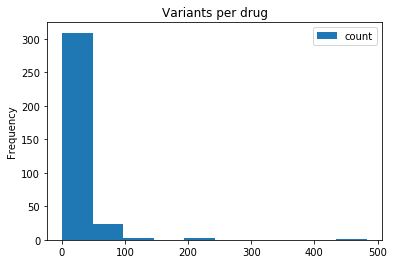

In [321]:
df = tables.get('drugs')
df_subset = df.loc[df['chemical'].map(lambda x: True if x not in excluded else False),['chemical','id']]
gb = df_subset.groupby(by=['chemical'])

df_vars_per_drug = gb.count()
df_vars_per_drug = df_vars_per_drug.rename(columns={'id':'count'}).reset_index()
chems_sorted = df_vars_per_drug.sort_values('count', ascending=True)['chemical'].tolist()
# print('{} ... {}'.format(chems_sorted[0:5], chems_sorted[-5:]))
chem_dtype = CategoricalDtype(categories=chems_sorted, ordered=True)
df_vars_per_drug['chemical'] = df_vars_per_drug['chemical'].astype(chem_dtype) 
df_vars_per_drug['group'] = df_vars_per_drug['chemical'].map(lambda x: 'selected' if x == last_drug_selected else 'background')
print('Number of drugs: %d' % len(df_vars_per_drug))
display(df_vars_per_drug.head(15))

df_vars_per_drug.plot(kind='hist', title='Variants per drug');

In [322]:
df_vars_per_drug['group'].describe()

count            337
unique             2
top       background
freq             336
Name: group, dtype: object

,chemical,count,group
0,acamprosate,4,background
1,acenocoumarol,72,background
2,acetaminophen,7,background
3,acetylcholine,1,background
4,acetylcysteine,5,background


Selected: azathioprine


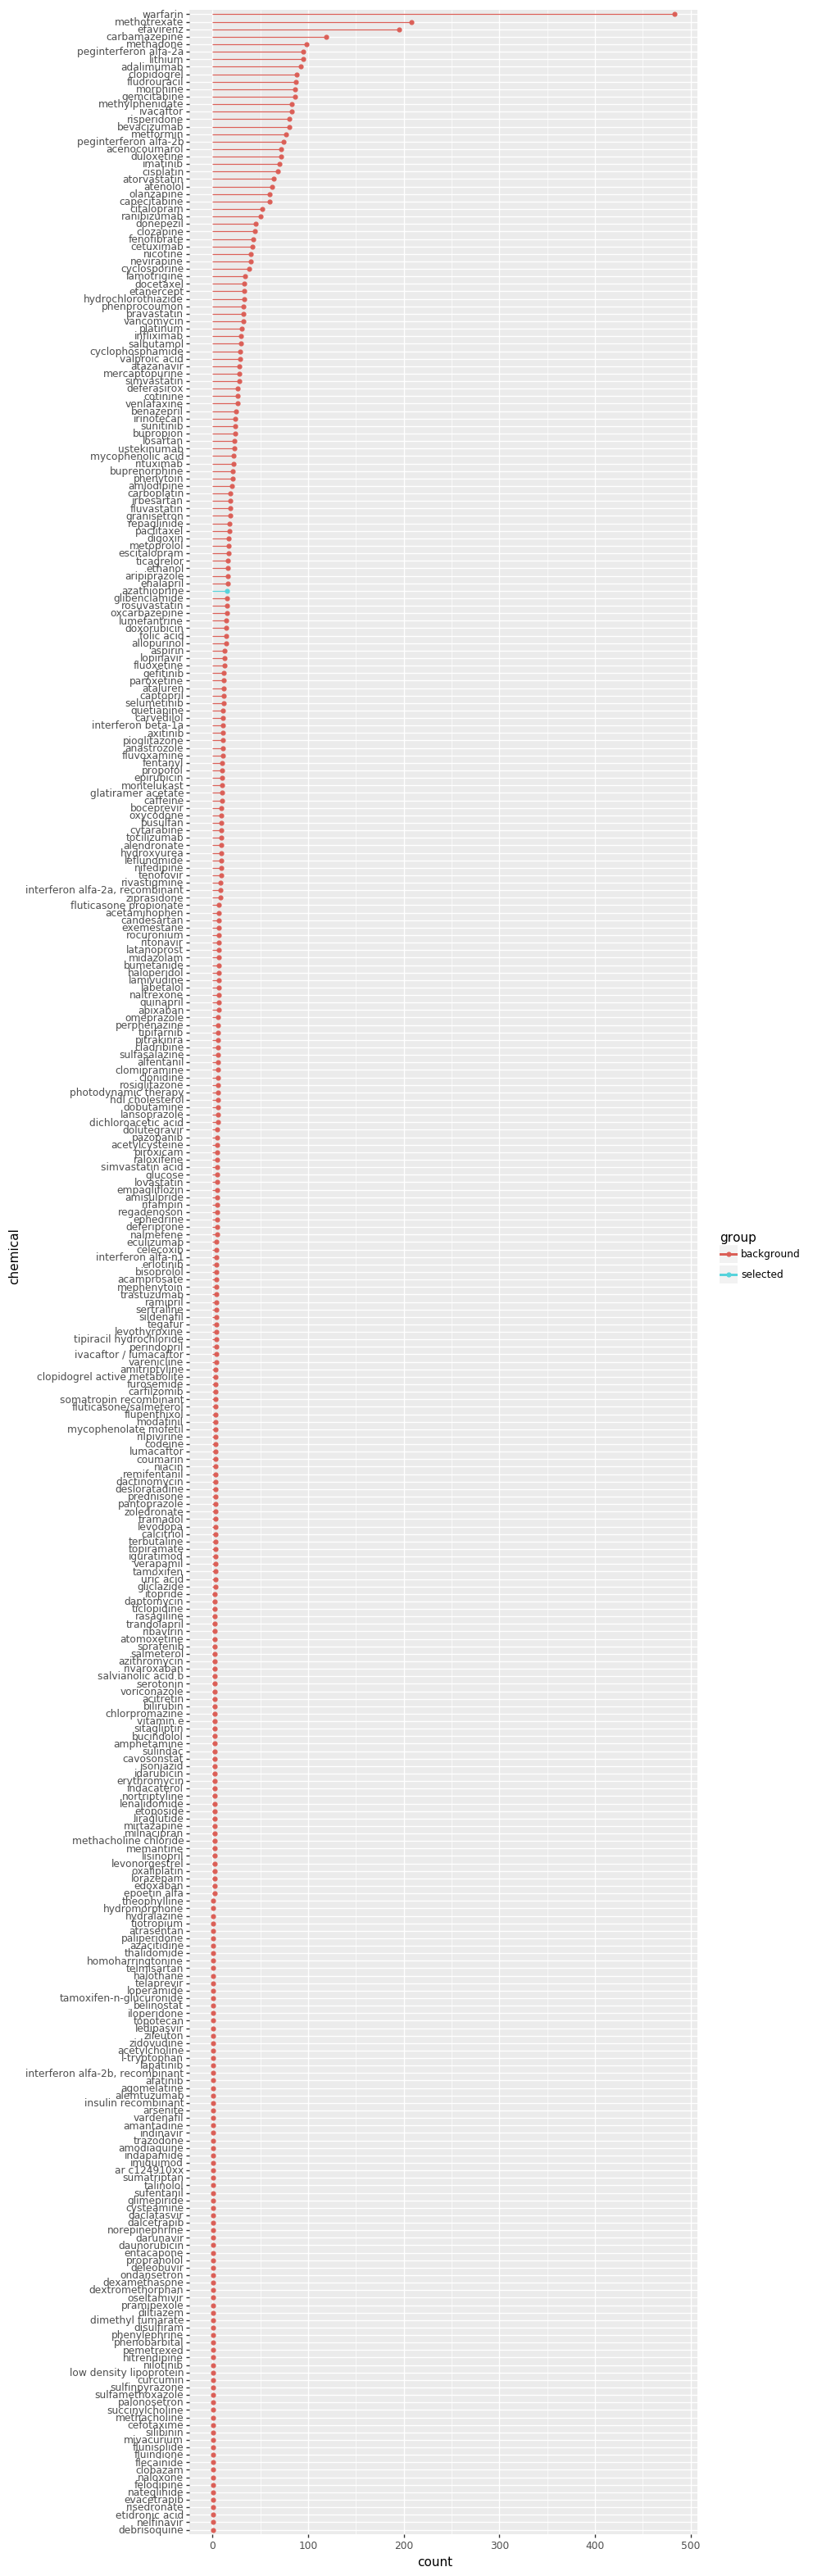

<ggplot: (-9223372029303772135)>

In [325]:
import plotnine
from plotnine import *
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


def plotgg(df, title='', figsize=(8,40), **kwargs):
    
    plotnine.options.figure_size = figsize
        
    display(df.head())
    print('Selected: %s' % last_drug_selected)
    p = (ggplot(df, aes(x='count', y='chemical', color='group'), )
         + geom_segment(aes(x = 0, y = 'chemical', xend = 'count', yend = 'chemical'), group='group' )
         + geom_point(aes(color='group'))
#          + scale_color_brewer(type='div', palette='RdBu')
    )

    
#     display(df.head(16))
    display(p)
    return p

p = plotgg(df_vars_per_drug);